In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

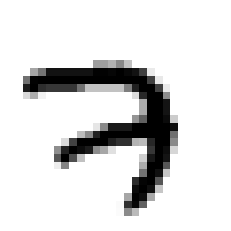

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

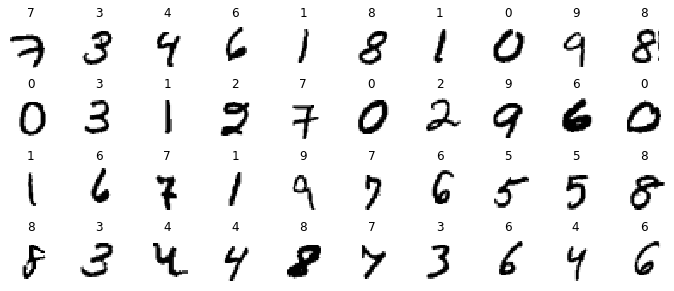

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
from keras.utils import np_utils
# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

#y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[7 3 4 ... 5 6 8]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=20)

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 2.1681 - accuracy: 0.3780 - val_loss: 1.9565 - val_accuracy: 0.5984
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 1.5912 - accuracy: 0.6555 - val_loss: 1.2095 - val_accuracy: 0.7044
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0034 - accuracy: 0.7609 - val_loss: 0.8226 - val_accuracy: 0.7938
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7400 - accuracy: 0.8111 - val_loss: 0.6399 - val_accuracy: 0.8366
Epoch 5/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6017 - accuracy: 0.8420 - val_loss: 0.5361 - val_accuracy: 0.8610
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5187 - accuracy: 0.8625 - val_loss: 0.4696 - val_accuracy: 0.8764
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4649 - accuracy: 0.8757 - val_loss: 0.4245 - val_accuracy:

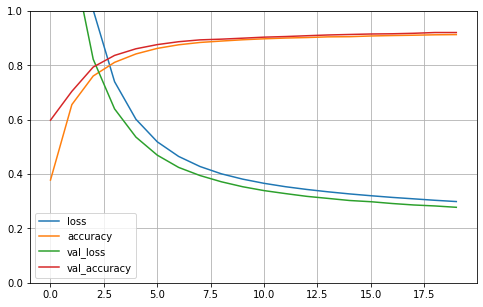

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 846us/step - loss: 0.2855 - accuracy: 0.9186


[0.2854810059070587, 0.9186000227928162]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.55, 0.02, 0.75, 0.95, 0.04, 0.56, 0.  , 1.  , 0.21, 0.95],
       [0.95, 0.33, 1.  , 0.98, 0.  , 0.96, 0.97, 0.  , 0.88, 0.  ],
       [0.  , 1.  , 0.88, 0.72, 0.09, 0.58, 0.44, 0.71, 0.63, 0.27]],
      dtype=float32)

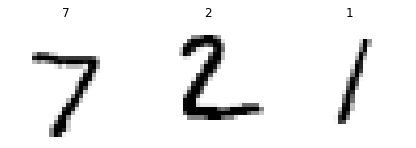

In [15]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()